# Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data

In [2]:
df = pd.read_csv('TRADES_CopyTr_90D_ROI.csv')
df

,Port_IDs,Trade_History
0,3925368433214965504,"[{'time': 1718899656000, 'symbol': 'SOLUSDT', ..."
1,4002413037164645377,"[{'time': 1718980078000, 'symbol': 'NEARUSDT',..."
2,3923766029921022977,"[{'time': 1718677164000, 'symbol': 'ETHUSDT', ..."
3,3994879592543698688,"[{'time': 1718678214000, 'symbol': 'ETHUSDT', ..."
4,3926423286576838657,"[{'time': 1718979615000, 'symbol': 'ETHUSDT', ..."
...,...,...
145,4000222729738650369,"[{'time': 1718982068000, 'symbol': 'ARKMUSDT',..."
146,3998659472131949824,"[{'time': 1718979385000, 'symbol': 'BTCUSDT', ..."
147,4028701921959171840,"[{'time': 1718984241000, 'symbol': 'BTCUSDT', ..."
148,4014818740371615232,"[{'time': 1718983357000, 'symbol': 'SOLUSDT', ..."


# Flattening and Normalizing Data

- Transforming and expanding nested transaction data within each portfolio, making it suitable for analysis in a flat, tabular format

In [3]:
import ast  #Abstract Syntax Tree importing 
def parse_transactions(transaction_str):
    try:
        return ast.literal_eval(transaction_str) 
    except:
        return None 

df['Trade_History'] = df['Trade_History'].apply(parse_transactions)
df_expanded = df[['Port_IDs', 'Trade_History']].explode('Trade_History').reset_index(drop=True)
transactions_df = pd.json_normalize(df_expanded['Trade_History'])
transactions_df['Port_IDs'] = df_expanded['Port_IDs']
transactions_df.head()

,time,symbol,side,price,fee,feeAsset,quantity,quantityAsset,realizedProfit,realizedProfitAsset,baseAsset,qty,positionSide,activeBuy,Port_IDs
0,1.718900e+12,SOLUSDT,BUY,132.53700,-0.994027,USDT,1988.05500,USDT,0.0,USDT,SOL,15.0,LONG,True,3925368433214965504
1,1.718900e+12,DOGEUSDT,BUY,0.12182,-0.279796,USDT,1398.98088,USDT,0.0,USDT,DOGE,11484.0,LONG,False,3925368433214965504
2,1.718900e+12,DOGEUSDT,BUY,0.12182,-0.039494,USDT,197.47022,USDT,0.0,USDT,DOGE,1621.0,LONG,False,3925368433214965504
3,1.718900e+12,DOGEUSDT,BUY,0.12182,-0.008284,USDT,16.56752,USDT,0.0,USDT,DOGE,136.0,LONG,True,3925368433214965504
4,1.718900e+12,DOGEUSDT,BUY,0.12182,-0.046109,USDT,92.21774,USDT,0.0,USDT,DOGE,757.0,LONG,True,3925368433214965504


# Basic Checks

In [4]:
transactions_df.describe()

,time,price,fee,quantity,realizedProfit,qty,Port_IDs
count,2.112770e+05,211277.000000,211277.000000,211277.000000,211277.000000,2.112770e+05,2.112780e+05
mean,1.717434e+12,4129.040315,-0.382787,975.509483,3.270818,1.090626e+04,3.964346e+18
std,1.351340e+09,15363.534288,1.793858,4667.098916,57.895095,1.562781e+05,6.102591e+16
min,1.713804e+12,0.000158,-120.458652,0.006694,-3269.194444,1.000000e-03,3.672755e+18
25%,1.716470e+12,0.143830,-0.179868,23.340915,0.000000,2.000000e+00,3.942631e+18
50%,1.717761e+12,2.483300,-0.051732,127.775000,0.000000,2.600000e+01,3.977117e+18
75%,1.718640e+12,44.621000,-0.009454,404.012000,0.577590,5.790000e+02,4.011627e+18
max,1.718990e+12,72105.000000,0.000000,602293.260000,8186.254058,2.100000e+07,4.041860e+18


In [5]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211278 entries, 0 to 211277
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 211277 non-null  float64
 1   symbol               211277 non-null  object 
 2   side                 211277 non-null  object 
 3   price                211277 non-null  float64
 4   fee                  211277 non-null  float64
 5   feeAsset             211277 non-null  object 
 6   quantity             211277 non-null  float64
 7   quantityAsset        211277 non-null  object 
 8   realizedProfit       211277 non-null  float64
 9   realizedProfitAsset  211277 non-null  object 
 10  baseAsset            211277 non-null  object 
 11  qty                  211277 non-null  float64
 12  positionSide         211277 non-null  object 
 13  activeBuy            211277 non-null  object 
 14  Port_IDs             211278 non-null  int64  
dtypes: float64(6), in

In [6]:
transactions_df.isnull().sum()

time                   1
symbol                 1
side                   1
price                  1
fee                    1
feeAsset               1
quantity               1
quantityAsset          1
realizedProfit         1
realizedProfitAsset    1
baseAsset              1
qty                    1
positionSide           1
activeBuy              1
Port_IDs               0
dtype: int64

# Exploratory Data Analysis
- EDA is the process of analyzing datasets to summarize their main characteristics, often using visual methods. It’s an essential step in data science and statistical analysis that allows for the following:
- Understanding Data Structure.
- Data Visualization: Using charts like histograms, box plots, scatter plots, and heatmaps to visually explore relationships and distributions.
- Data Cleaning: Identifying and handling missing values, duplicates, or inconsistent data entries.

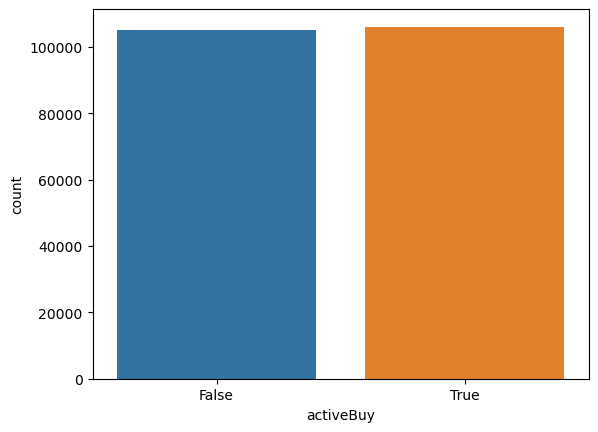

In [7]:
sns.countplot(x="activeBuy", data=transactions_df)
plt.show()

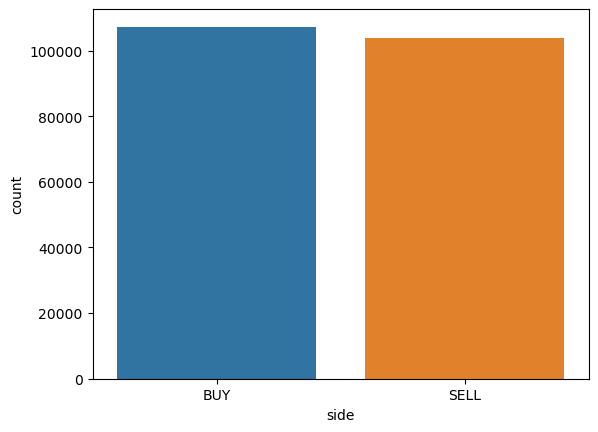

In [8]:
sns.countplot(x="side", data=transactions_df)
plt.show()

# Distribution of the data
- To visualize the distribution of each numeric variable, helping identify outliers, spread, and skewness within the data.


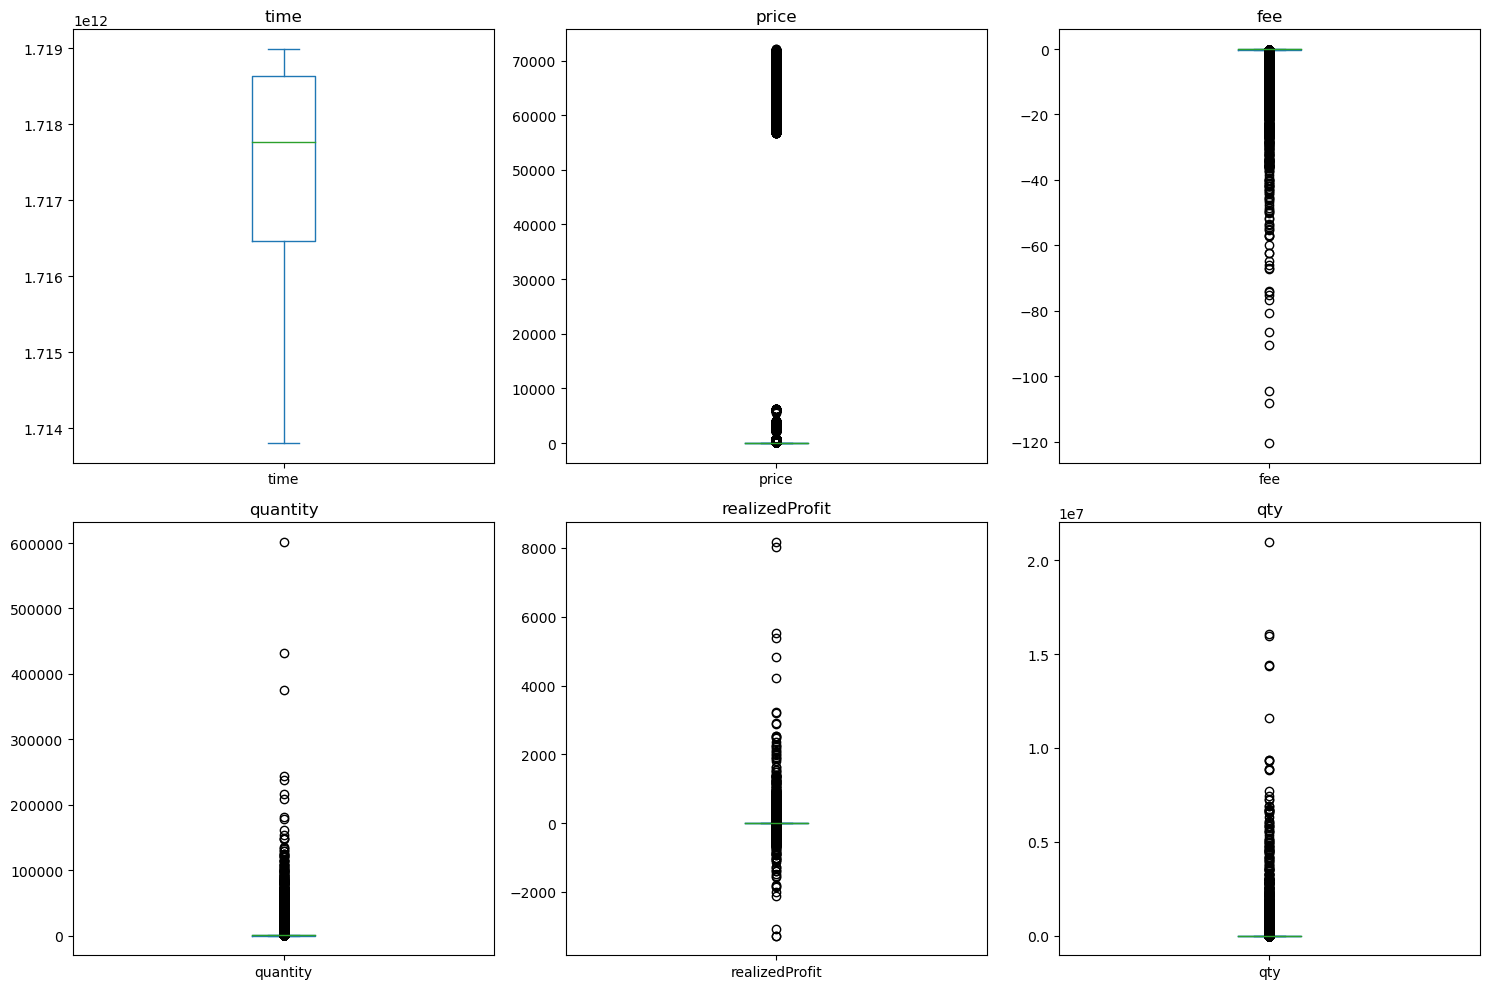

In [9]:
numeric_df = transactions_df.select_dtypes(include=['int64', 'float64']).drop(columns=['Port_IDs'])
#creating a new DataFrame, numeric_df,containing only numeric columns (excluding Port_IDs)
num_columns = numeric_df.shape[1]#stores the count of numeric columns
rows = (num_columns // 3) + (num_columns % 3 > 0)
#calculates the necessary number of rows for a 3-column layout by dividing num_columns by 3 and adjusting for any remainder.


fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))
#subplots, where rows is the number of rows, and each row has 3 columns,
#sets the figure size,based on the number of rows.


for i, column in enumerate(numeric_df.columns):#to map each column to its correct position in the 3-column grid.
    row, col = divmod(i, 3)
    numeric_df[column].plot(kind='box', ax=axes[row, col], title=column)
#generates a box plot for each numeric column, setting the title to the column name.
for j in range(i+1, rows * 3):
    fig.delaxes(axes.flatten()[j])
#removes any unused subplots if the number of numeric columns doesn’t perfectly fill the grid.
plt.tight_layout()#optimizes spacing for clarity
plt.show()#displays the entire figure

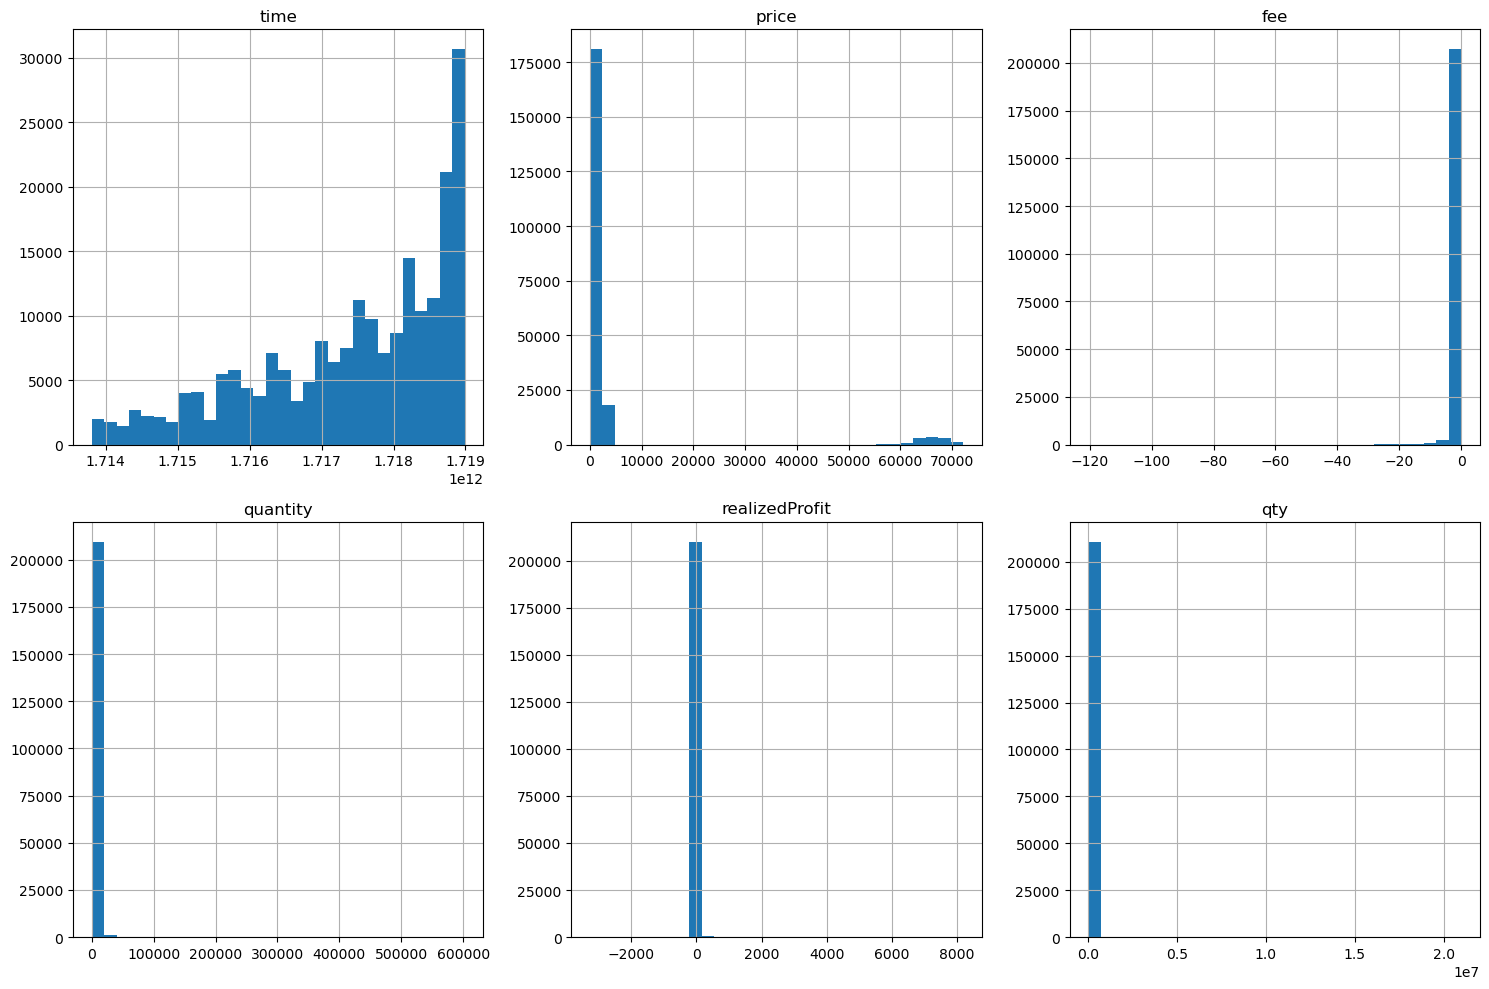

In [10]:
num_columns = numeric_df.shape[1]#gets the total count of numeric columns
rows = (num_columns // 3) + (num_columns % 3 > 0)
#calculates the number of rows needed in a 3-column
fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))
#Each row has 3 columns
for i, column in enumerate(numeric_df.columns):
    row, col = divmod(i, 3)
    numeric_df[column].hist(ax=axes[row, col], bins=30)# generates a histogram for each column, using 30 bins to show the data distribution
    axes[row, col].set_title(column)# labels each histogram with the column name for clarity.

for j in range(i+1, rows * 3):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

# Feature Selection

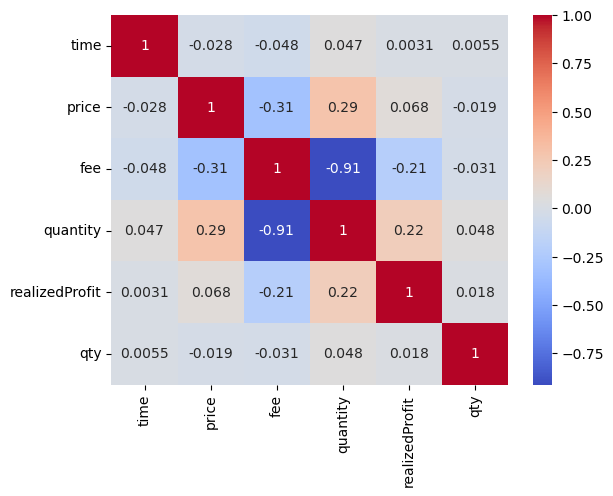

In [11]:
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.show()

# Metrics for Each Portfolio

In [12]:
grouped = transactions_df.groupby('Port_IDs')#groups the data by each unique Port_IDs in transactions_df, creating subsets for each portfolio ID.

def calculate_metrics(group):
    total_investment = (group['price'] * group['quantity']).sum()
    pnl = group['realizedProfit'].sum()#aggregates the total realized profit or loss.
    roi = pnl / total_investment if total_investment != 0 else np.nan
    #computes ROI as a ratio of PnL to total investment, avoiding division by zero by returning NaN if total_investment is zero.
    sharpe_ratio = group['realizedProfit'].mean() / group['realizedProfit'].std() if group['realizedProfit'].std() != 0 else np.nan
    
    cum_return = (1 + group['realizedProfit'].cumsum()).fillna(0)
    rolling_max = cum_return.cummax()#rolling maximum of cumulative returns
    drawdown = rolling_max - cum_return#measures the drawdown at each poin
    max_drawdown = drawdown.max()#gives the maximum drawdown value, representing the largest peak-to-trough decline.
    win_positions = (group['realizedProfit'] > 0).sum()
    #counts the number of profitable (positive realizedProfit) transactions
    total_positions = len(group)#counts the total transactions
    win_rate = win_positions / total_positions if total_positions > 0 else np.nan
    
    return pd.Series({ # returns all computed metrics as a pandas Series
        'PnL': pnl,
        'ROI': roi,
        'Sharpe_Ratio': sharpe_ratio,
        'MDD': max_drawdown,
        'Win_Rate': win_rate,
        'Win_Positions': win_positions,
        'Total_Positions': total_positions
    })

final_df = grouped.apply(calculate_metrics).reset_index()
#which holds the calculated metrics for each portfolio

In [13]:
final_df.head()

,Port_IDs,PnL,ROI,Sharpe_Ratio,MDD,Win_Rate,Win_Positions,Total_Positions
0,3672754654734989568,566.597660,6.066456e-07,0.185274,80.777037,0.443038,210.0,474.0
1,3733192481840423936,2923.977200,5.288870e-08,0.060265,2743.120000,0.802612,553.0,689.0
2,3768170840939476993,243.668899,4.201746e-04,0.424277,0.000000,0.428571,6.0,14.0
3,3784403294629753856,2521.814305,7.161951e-06,0.106585,271.291981,0.302314,1829.0,6050.0
4,3786761687746711808,205.021400,7.330496e-08,0.215150,123.460267,0.451220,37.0,82.0


# Machine Learning Model Creation

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

X = final_df.drop(['Port_IDs', 'Win_Positions'], axis=1)
y = final_df['Win_Positions']

In [15]:
X.fillna(X.mean(), inplace=True)#Fills any missing values

scaler = StandardScaler()#which standardizes features by removing the mean and scaling to unit variance.
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
#applies scaling to X, transforming it into a standardized form
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
#splits the data into training and testing sets with an 80-20 split, using random_state 
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)#trains the model using the training data

y_pred = model.predict(X_test)#generates predictions on the test set
accuracy = accuracy_score(y_test, y_pred)# calculates the accuracy score by comparing y_pred to the actual labels (y_test), measuring how well the model performs.

feature_importances = model.feature_importances_#retrieves the importance scores of each feature
features = X.columns#stores the column names 

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
#create df to store each features importance,sorted descending order to highlight most impactul features

In [16]:
print("Accuracy:", accuracy)
print(feature_importance_df)

Accuracy: 0.0
           Feature  Importance
5  Total_Positions    0.211402
0              PnL    0.194222
3              MDD    0.172580
4         Win_Rate    0.155298
1              ROI    0.140289
2     Sharpe_Ratio    0.126210


In [17]:
top_20_accounts = final_df.sort_values(by='PnL', ascending=False).head(20)
top_20_accounts.head()

,Port_IDs,PnL,ROI,Sharpe_Ratio,MDD,Win_Rate,Win_Positions,Total_Positions
97,4020204877254599680,71998.855953,5.489224e-08,0.060748,21338.051188,0.329421,1993.0,6050.0
76,3999240873283311617,42574.473679,9.981064e-04,0.227505,300.813848,0.523220,2366.0,4522.0
99,4021669203289716224,26427.331592,1.052335e-07,0.068251,2537.866629,0.313912,528.0,1682.0
51,3960874214179953664,19567.471286,6.322932e-08,0.162948,2234.000000,0.515684,1233.0,2391.0
17,3907081197088384000,18015.997370,3.834843e-04,0.222729,2060.707122,0.613971,2540.0,4137.0


In [18]:
top_20_accounts = final_df.sort_values(by='ROI', ascending=False).head(20)
top_20_accounts.head()

,Port_IDs,PnL,ROI,Sharpe_Ratio,MDD,Win_Rate,Win_Positions,Total_Positions
59,3977234346014419201,2427.292831,0.365305,0.304736,0.000000,0.397590,33.0,83.0
120,4030708912786799105,1612.843770,0.232125,0.184141,0.000000,0.033333,2.0,60.0
103,4023697433751327232,2408.224000,0.228249,0.300159,0.000000,0.095238,4.0,42.0
111,4029506971304830209,2413.654000,0.219679,0.244907,1.271504,0.057692,3.0,52.0
82,4004713168329653760,1667.198610,0.198859,0.277411,0.000000,0.074074,2.0,27.0


# Final output file

In [19]:
final_df.to_csv('final_df.csv', index=False)

# ---end---